In [14]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

In [15]:
SGA_colorindex = Table.read("SGA_colorindex.fits")

In [16]:
SGA_colorindex

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,g_r,r_z,g_z
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32
2,SGA-2020 2,PGC1283207,1283207,228.3770865,5.4232017,S?,152.2,0.36307806,0.724436,0.03463229,23.40448,16.976,False,LEDA-20181114,0,PGC1283207,1,True,228.3770865,5.4232017,0.36307806,2283p055,228.3770803831908,5.423191398593787,0.49470574,SB26,158.20142,0.545691,228.37700918822188,5.4232652570544015,10.897086,3.3509698,3.1147978,3.240862,5.902337,6.9126143,7.941369,8.997992,10.073601,11.199986,12.391357,13.561038,14.841172,16.966799,16.108246,15.486356,16.879545,16.024958,15.400715,16.818878,15.967034,15.341793,16.776297,15.925804,15.300776,16.746685,15.897334,15.272053,16.725166,15.876816,15.2521105,16.708357,15.862035,15.237181,16.696539,15.851936,15.226998,16.689613,15.844313,15.21976,0.013392451,0.02354,0.021872982,0.01736985,0.024445537,0.039866067,0.05026544,0.08455789,0.122911856,0.005682776,0.0054258136,0.0049038026,0.005588406,0.005323561,0.0047632363,0.00543534,0.005177031,0.0046343105,0.0053025587,0.005040888,0.0045181247,0.005206092,0.0049438984,0.0044374703,0.0051483097,0.0048758644,0.0043834248,0.0051032505,0.0048264163,0.004344248,0.0050705094,0.004792021,0.004319857,0.005054293,0.004765629,0.0043044444,16.65942,0.34037337,0.2978292,3.0239506,0.07928849,15.820566,0.2640441,0.34559453,3.3033552,0.003811298,15.195567,0.29826432,0.3001073,3.2333765,0.011723555,0,0.8453007,0.6245527,1.4698534
3,SGA-2020 3,PGC1310416,1310416,202.54443750000002,6.9345944,Sc,159.26,0.4017908,0.7816278,0.073888786,23.498482,16.85,False,LEDA-20

In [17]:
SGA_colorindex['R_COG_PARAMS_ALPHA1']
SGA_colorindex['R_COG_PARAMS_ALPHA1'][SGA_colorindex['R_COG_PARAMS_ALPHA1'] == -1] = np.nan
SGA_colorindex['R_COG_PARAMS_ALPHA2']
SGA_colorindex['R_COG_PARAMS_ALPHA2'][SGA_colorindex['R_COG_PARAMS_ALPHA2'] == -1] = np.nan

In [18]:
M0= np.array(SGA_colorindex['R_COG_PARAMS_M0'])
Alpha1= np.array(SGA_colorindex['R_COG_PARAMS_ALPHA1'])
Alpha2= np.array(SGA_colorindex['R_COG_PARAMS_ALPHA2'])
r0= np.power(10,11)


In [19]:
print(min(Alpha2))
print(min(Alpha1))

5.9370144e-19
7.56041e-09


In [20]:
y = (-np.log10(0.9))/(0.4*M0)

x =(1/Alpha1)*((np.exp(y))-1)
                 
j = ((-1)/Alpha2)
                 
r90 = np.power(x,j) * r0

/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/2838616529.py:3: RuntimeWarning: overflow encountered in exp
  x =(1/Alpha1)*((np.exp(y))-1)
/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/2838616529.py:7: RuntimeWarning: divide by zero encountered in power
  r90 = np.power(x,j) * r0
/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/2838616529.py:7: RuntimeWarning: overflow encountered in power
  r90 = np.power(x,j) * r0


In [21]:
t = (-np.log10(0.5))/(0.4*M0)

z =(1/Alpha1)*((np.exp(t))-1)
                 
d = ((-1)/Alpha2)
                 
r50 = np.power(z,d) * r0

/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/2545641276.py:3: RuntimeWarning: overflow encountered in exp
  z =(1/Alpha1)*((np.exp(t))-1)
/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/2545641276.py:3: RuntimeWarning: overflow encountered in multiply
  z =(1/Alpha1)*((np.exp(t))-1)
/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/2545641276.py:7: RuntimeWarning: divide by zero encountered in power
  r50 = np.power(z,d) * r0


In [22]:
s = (-np.log10(0.2))/(0.4*M0)

f =(1/Alpha1)*((np.exp(s))-1)
                 
d = ((-1)/Alpha2)
                 
r20 = np.power(f,d) * r0 

/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/501975306.py:3: RuntimeWarning: overflow encountered in exp
  f =(1/Alpha1)*((np.exp(s))-1)
/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/501975306.py:3: RuntimeWarning: overflow encountered in multiply
  f =(1/Alpha1)*((np.exp(s))-1)
/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/501975306.py:7: RuntimeWarning: divide by zero encountered in power
  r20 = np.power(f,d) * r0


In [23]:
SGA_colorindex.add_column(col= r90, name ="r90")
SGA_colorindex.add_column(col= r50, name ="r50")
SGA_colorindex.add_column(col= r20, name ="r20")

In [24]:
C_59 = r50 / r90
C_29 = r20/ r90

/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/1990575908.py:1: RuntimeWarning: invalid value encountered in true_divide
  C_59 = r50 / r90
/var/folders/pn/jdscsft91l5_l5r9mtb9l3y80000gn/T/ipykernel_77527/1990575908.py:2: RuntimeWarning: invalid value encountered in true_divide
  C_29 = r20/ r90


In [25]:
SGA_colorindex.add_column(col= C_59, name ="C_r50_r90")
SGA_colorindex.add_column(col= C_29, name ="C_r20_r90")

In [26]:
SGA_colorindex 

SGA_ID,SGA_GALAXY,GALAXY,PGC,RA_LEDA,DEC_LEDA,MORPHTYPE,PA_LEDA,D25_LEDA,BA_LEDA,Z_LEDA,SB_D25_LEDA,MAG_LEDA,BYHAND,REF,GROUP_ID,GROUP_NAME,GROUP_MULT,GROUP_PRIMARY,GROUP_RA,GROUP_DEC,GROUP_DIAMETER,BRICKNAME,RA,DEC,D26,D26_REF,PA,BA,RA_MOMENT,DEC_MOMENT,SMA_MOMENT,G_SMA50,R_SMA50,Z_SMA50,SMA_SB22,SMA_SB22.5,SMA_SB23,SMA_SB23.5,SMA_SB24,SMA_SB24.5,SMA_SB25,SMA_SB25.5,SMA_SB26,G_MAG_SB22,R_MAG_SB22,Z_MAG_SB22,G_MAG_SB22.5,R_MAG_SB22.5,Z_MAG_SB22.5,G_MAG_SB23,R_MAG_SB23,Z_MAG_SB23,G_MAG_SB23.5,R_MAG_SB23.5,Z_MAG_SB23.5,G_MAG_SB24,R_MAG_SB24,Z_MAG_SB24,G_MAG_SB24.5,R_MAG_SB24.5,Z_MAG_SB24.5,G_MAG_SB25,R_MAG_SB25,Z_MAG_SB25,G_MAG_SB25.5,R_MAG_SB25.5,Z_MAG_SB25.5,G_MAG_SB26,R_MAG_SB26,Z_MAG_SB26,SMA_SB22_ERR,SMA_SB22.5_ERR,SMA_SB23_ERR,SMA_SB23.5_ERR,SMA_SB24_ERR,SMA_SB24.5_ERR,SMA_SB25_ERR,SMA_SB25.5_ERR,SMA_SB26_ERR,G_MAG_SB22_ERR,R_MAG_SB22_ERR,Z_MAG_SB22_ERR,G_MAG_SB22.5_ERR,R_MAG_SB22.5_ERR,Z_MAG_SB22.5_ERR,G_MAG_SB23_ERR,R_MAG_SB23_ERR,Z_MAG_SB23_ERR,G_MAG_SB23.5_ERR,R_MAG_SB23.5_ERR,Z_MAG_SB23.5_ERR,G_MAG_SB24_ERR,R_MAG_SB24_ERR,Z_MAG_SB24_ERR,G_MAG_SB24.5_ERR,R_MAG_SB24.5_ERR,Z_MAG_SB24.5_ERR,G_MAG_SB25_ERR,R_MAG_SB25_ERR,Z_MAG_SB25_ERR,G_MAG_SB25.5_ERR,R_MAG_SB25.5_ERR,Z_MAG_SB25.5_ERR,G_MAG_SB26_ERR,R_MAG_SB26_ERR,Z_MAG_SB26_ERR,G_COG_PARAMS_MTOT,G_COG_PARAMS_M0,G_COG_PARAMS_ALPHA1,G_COG_PARAMS_ALPHA2,G_COG_PARAMS_CHI2,R_COG_PARAMS_MTOT,R_COG_PARAMS_M0,R_COG_PARAMS_ALPHA1,R_COG_PARAMS_ALPHA2,R_COG_PARAMS_CHI2,Z_COG_PARAMS_MTOT,Z_COG_PARAMS_M0,Z_COG_PARAMS_ALPHA1,Z_COG_PARAMS_ALPHA2,Z_COG_PARAMS_CHI2,ELLIPSEBIT,g_r,r_z,g_z,r90,r50,r20,C_r50_r90,C_r20_r90
int64,bytes16,bytes29,int64,float64,float64,bytes21,float32,float32,float32,float32,float32,float32,bool,bytes13,int64,bytes35,int16,bool,float64,float64,float32,bytes8,float64,float64,float32,bytes4,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float64,float64,float64,float64,float64
2,SGA-2020 2,PGC1283207,1283207,228.3770865,5.4232017,S?,152.2,0.36307806,0.724436,0.03463229,23.40448,16.976,False,LEDA-20181114,0,PGC1283207,1,True,228.3770865,5.4232017,0.36307806,2283p055,228.3770803831908,5.423191398593787,0.49470574,SB26,158.20142,0.545691,228.37700918822188,5.4232652570544015,10.897086,3.3509698,3.1147978,3.240862,5.902337,6.9126143,7.941369,8.997992,10.073601,11.199986,12.391357,13.561038,14.841172,16.966799,16.108246,15.486356,16.879545,16.024958,15.400715,16.818878,15.967034,15.341793,16.776297,15.925804,15.300776,16.746685,15.897334,15.272053,16.725166,15.876816,15.2521105,16.708357,15.862035,15.237181,16.696539,15.851936,15.226998,16.689613,15.844313,15.21976,0.013392451,0.02354,0.021872982,0.01736985,0.024445537,0.039866067,0.05026544,0.08455789,0.122911856,0.005682776,0.0054258136,0.0049038026,0.005588406,0.005323561,0.0047632363,0.00543534,0.005177031,0.0046343105,0.0053025587,0.005040888,0.0045181247,0.005206092,0.0049438984,0.0044374703,0.0051483097,0.0048758644,0.0043834248,0.0051032505,0.0048264163,0.004344248,0.0050705094,0.004792021,0.004319857,0.005054293,0.004765629,0.0043044444,16.65942,0.34037337,0.2978292,3.0239506,0.07928849,15.820566,0.2640441,0.34559453,3.3033552,0.003811298,15.195567,0.29826432,0.3001073,3.2333765,0.011723555,0,0.8453007,0.6245527,1.4698534,87252831459.04541,31147974729.537964,9781958162.784576,0.356

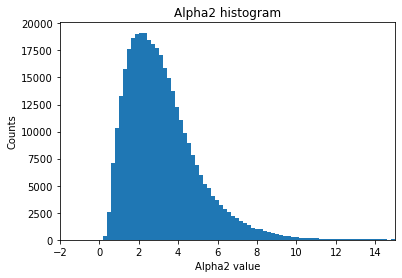

In [27]:
plt.hist(Alpha2, bins=900)
plt.xlim([-2,15])
plt.title("Alpha2 histogram")
plt.ylabel('Counts')
plt.xlabel('Alpha2 value')
plt.show()
plt.close()

In [28]:
SGA_colorindex.write('SGA_Cindex.fits', overwrite = True)

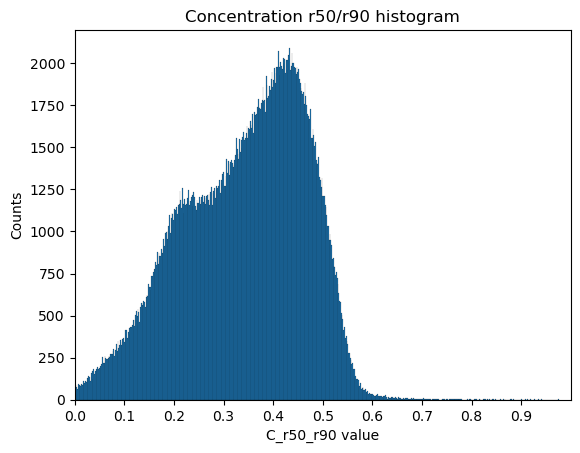

In [25]:
plt.hist(C_59, bins= 600, edgecolor='black', linewidth=0.1)
plt.title("Concentration r50/r90 histogram")
plt.ylabel('Counts')
plt.xlabel('C_r50_r90 value')
plt.xlim([0,1])
plt.xticks(np.arange(0, 1, 0.1))

plt.savefig('C_r50_r90.png')
plt.show()
plt.close()

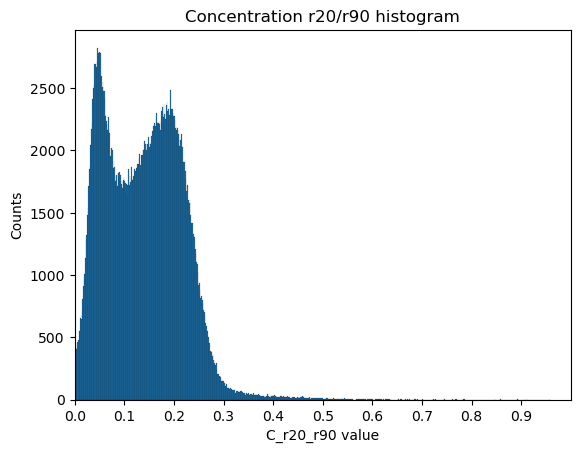

In [26]:
plt.hist(C_29, bins= 700, edgecolor='black', linewidth=0.1)
plt.title("Concentration r20/r90 histogram")
plt.ylabel('Counts')
plt.xlabel('C_r20_r90 value')
plt.xlim([0,1])
plt.xticks(np.arange(0, 1, 0.1))

plt.savefig('C_r20_r90.png')
plt.show()
plt.close()